In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("diamond.csv")

In [4]:
df

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641
...,...,...,...,...,...,...
303,304,1.01,I,VS1,HRD,8175
304,305,1.02,F,VVS2,HRD,10796
305,306,1.06,H,VVS2,HRD,9890
306,307,1.02,H,VS2,HRD,8959


Data Preparation

In [6]:
#Isolate X and Y
y = df.price
X = df.carat

Adding Constant

In [7]:
#Adding Constant 
X = sm.add_constant(X)
X.head(2)

,const,carat
0,1.0,0.3
1,1.0,0.3


Linear Regression

In [10]:
#Regression Model
model1 = sm.OLS(endog=y, exog = X).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):          3.04e-150
Time:                        16:59:19   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

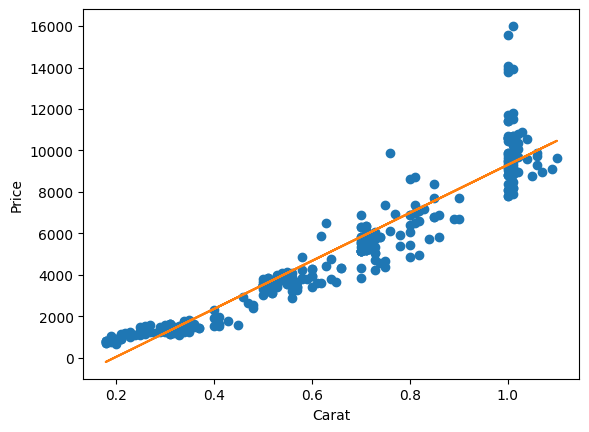

In [12]:
#plotting
X = df.carat
plt.plot(X,y, 'o')
b, a = np.polyfit(X, y, 1)
plt.plot(X, b * X + a)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

 Linear Regression with Dummy Variable

In [13]:
#look at carat available
df.carat.describe()

count    308.000000
mean       0.630909
std        0.277183
min        0.180000
25%        0.350000
50%        0.620000
75%        0.850000
max        1.100000
Name: carat, dtype: float64

In [16]:
df["carat_binary"] = np.where(df.carat > 0.6, 1, 0)
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price,carat_binary
0,1,0.30,D,VS2,GIA,1302,0
1,2,0.30,E,VS1,GIA,1510,0
2,3,0.30,G,VVS1,GIA,1510,0
3,4,0.30,G,VS1,GIA,1260,0
4,5,0.31,D,VS1,GIA,1641,0


In [17]:
#Isolate the X and y
X = df.carat_binary
y = df.price

In [18]:
#Add Constant
X = sm.add_constant(X)

In [20]:
#Linear Regression
model2 = sm.OLS(endog=y, exog = X).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.79e-73
Time:                        17:18:16   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2225.2303    161.442     13.783   

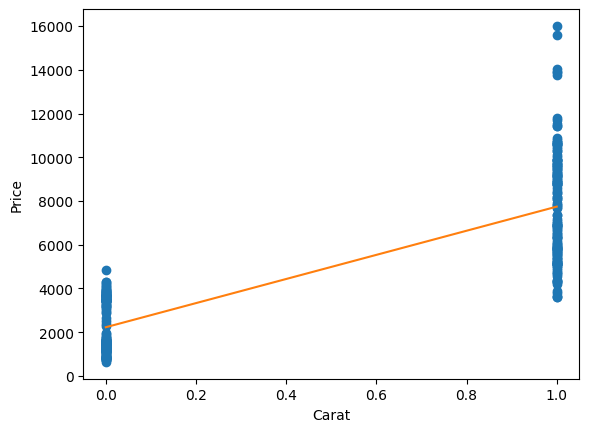

In [21]:
#plotting
X = df.carat_binary
plt.plot(X,y, 'o')
b, a = np.polyfit(X, y, 1)
plt.plot(X, b * X + a)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()